In [36]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
print('Dataset description:\n',df.describe())
df.head(5109)

Dataset description:
                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


      gender   age  hypertension  heart_disease ever_married Residence_type  \
0       Male  67.0             0              1          Yes          Urban   
1     Female  61.0             0              0          Yes          Rural   
2       Male  80.0             0              1          Yes          Rural   
3     Female  49.0             0              0          Yes          Urban   
4     Female  79.0             1              0          Yes          Rural   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes          Urban   
5106  Female  81.0             0              0          Yes          Urban   
5107  Female  35.0             0              0          Yes          Rural   
5108    Male  51.0             0              0          Yes          Rural   
5109  Female  44.0             0              0          Yes          Urban   

      avg_glucose_level   bmi   smoking_status  
0 

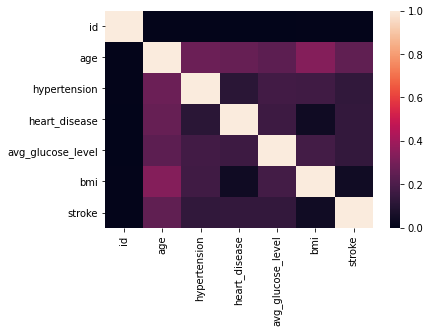

In [37]:
import seaborn as sns
sns.heatmap(df.corr())

x=df.drop(columns=['id','work_type','stroke'])
y=df['stroke']

x= x.fillna(method='ffill')
print(x)

from sklearn.preprocessing import OrdinalEncoder
encoding=OrdinalEncoder()

encoding.fit(x)
x=encoding.transform(x)

print(x)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.002)

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)

print("x_test:\n",x_test)
x_test= encoding.inverse_transform(x_test)
print("x_test (original):\n",x_test)
print("y_test:\n",y_test)
print("Accuracy=",score*100,"%")

x_test:
 [[0.000e+00 7.200e+01 0.000e+00 0.000e+00 1.000e+00 1.000e+00 4.540e+02
  2.040e+02 1.000e+00]
 [1.000e+00 6.500e+01 0.000e+00 0.000e+00 1.000e+00 1.000e+00 1.971e+03
  1.330e+02 1.000e+00]
 [0.000e+00 1.010e+02 1.000e+00 0.000e+00 0.000e+00 1.000e+00 4.150e+02
  2.270e+02 2.000e+00]
 [1.000e+00 7.500e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.615e+03
  1.630e+02 2.000e+00]
 [1.000e+00 5.700e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.522e+03
  2.740e+02 2.000e+00]
 [1.000e+00 7.300e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00 3.160e+02
  1.720e+02 2.000e+00]
 [1.000e+00 6.100e+01 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.444e+03
  1.220e+02 0.000e+00]
 [0.000e+00 7.200e+01 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.032e+03
  2.740e+02 3.000e+00]
 [1.000e+00 2.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.900e+01
  5.300e+01 0.000e+00]
 [1.000e+00 2.400e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00 7.220e+02
  6.100e+01 0.000e+00]
 [0.000e+00 2.400e+01 0.000e+00 0.000e+00